<a href="https://colab.research.google.com/github/VARUN3WARE/dog/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is build as an end to end multi class image classifier using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem
Identifying a dog breed by seeing an image of it.

## 2. Data
The data we are gonna be using will be from kaggle website

## 3. Evalution
This would be a file containing probabilities for each dog breed of each test image.

## 4. Features
some info:
* there are 120 breeds of dogs
* we are dealing with images that is unstructured data
* There are about 10,000 images in train and test set both


In [ ]:
#unzippin the data in  google drive
# !unzip "drive/MyDrive/dog_vision/dog-breed-identification.zip" -d "drive/MyDrive/dog_vision/"
# Expand-Archive -LiteralPath "drive/MyDrive/dog_vision/dog-breed-identification.zip" -DestinationPath "drive/MyDrive/dog_vision/"

### get our workspace ready

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF Hub version",tf.__version__)

TF version: 2.15.0
TF Hub version 2.15.0


In [ ]:
# check for GPU availability
print("GPU","available (YES YES!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YES YES!!)


## getting our data ready

as all ml models our data needs to be in numbers.
Now, we would be converting our images to tensors(numeric representation).

In [ ]:
#checkout the labels of our data
import pandas as pd
labels_csv=pd.read_csv("drive/MyDrive/dog_vision/labels.csv")

In [ ]:
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


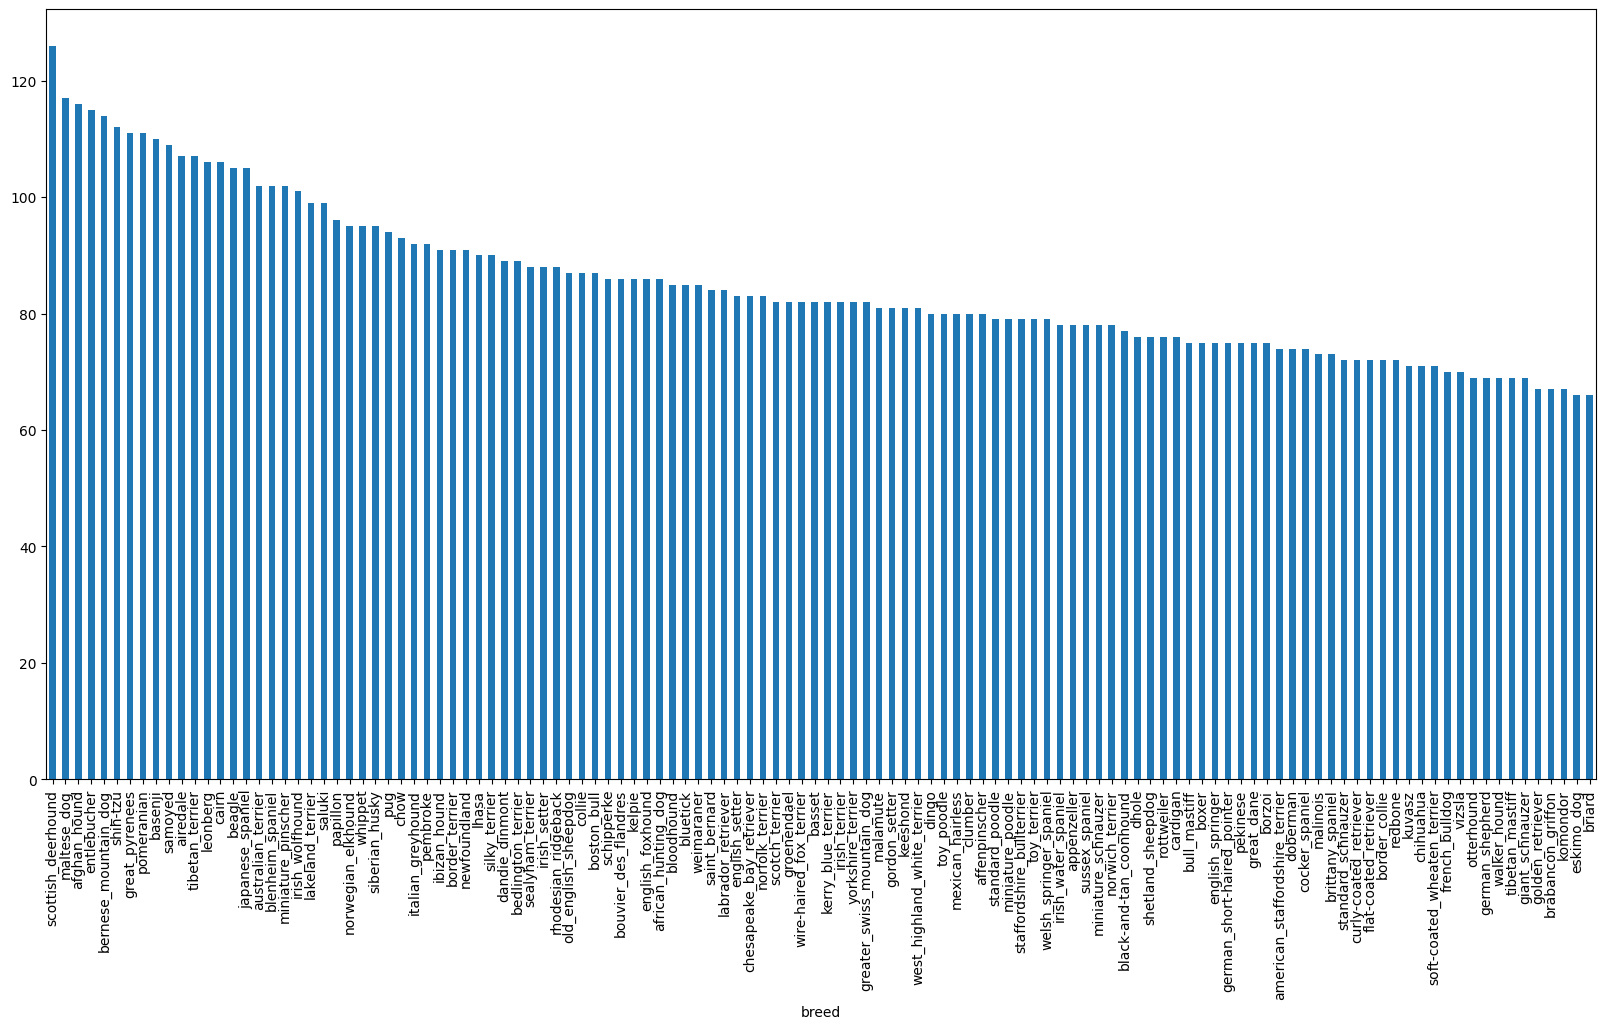

In [ ]:
  labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

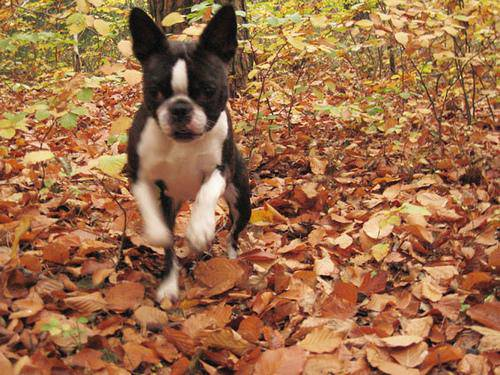

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## getting images and their labels

let's get a list of all of our image file patterns

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# create pathnames from image ID's
filenames = ["drive/MyDrive/dog_vision/train/"+fname +".jpg" for fname in labels_csv["id"] ]

filenames[:10]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#check wether the number of images is equal to total in filenames
import os
if len(os.listdir("drive/MyDrive/dog_vision/train/"))== len(filenames):
  print("OK")

OK


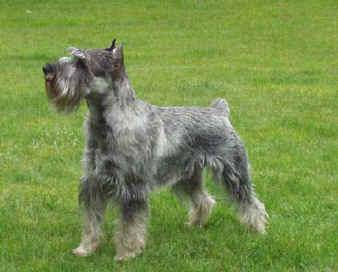

In [ ]:
Image(filenames[9941])

since now we have got our training image filepaths in a list, let's prepare our labels

In [ ]:
import numpy as np
labels=labels_csv["breed"].to_numpy() #does same as what next line would have done
#labels= np.array(labels)
labels,len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [ ]:
#cross-check label matches no.of in filenames
if len(labels)==len(filenames):
  print("OK")

OK


In [ ]:
unique_breeds= np.unique(labels)
unique_breeds


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#turn every label into a boolean arrray
boolean_labels= [label == unique_breeds for label in labels]
boolean_labels[5]

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### Example

In [ ]:
#turning boolean array into integers
print(labels[0])#orignal label
print(np.where(unique_breeds== labels[0]))# index where label occurs
print(boolean_labels[0].argmax())#index where label will occur in boolean array
print(boolean_labels[0].astype(int))#there will 1 where sample label occur else 0

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## creating our own validation set

since data from kaggle doesn't come with validation set we have to do it on our own.

In [ ]:
#setup x and y variables
x= filenames
y=boolean_labels

In [ ]:
len(x)

10222

we are gonna be starting to experiment on ~ 1000 only and then inc. as needed

In [ ]:
#set no. of images to be use for experiment
NUM_IMAGES= 1000#@param {type:"slider",min:1000,max:10000,steps:1000}

In [ ]:
# let's split our data into train and valid
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

len(y_train),len(y_val)

(800, 200)

## preprocessing images (turning images into tensors)
to preprocess our images into tensor we are going to write a function which does a few things:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg ) to tensors
4. Normalise our image (convert color channel values from 0-255 to 0-1)
5. Resize the image to be a size of (224,224)
6. Returned the modified image

Before we do it let's see what an image looks like..

In [ ]:
#convert an image to a numpy array
from matplotlib.pyplot import imread
image= imread(filenames[42])
image.shape,len(image),image.max(),image.min()

((257, 350, 3), 257, 255, 0)

In [ ]:
image[:1]

<tf.Tensor: shape=(1, 500, 3), dtype=uint8, numpy=
array([[[107,  45,   0],
        [151,  91,  41],
        [177, 119,  69],
        ...,
        [175, 143,  68],
        [189, 157,  82],
        [213, 181, 106]]], dtype=uint8)>

In [ ]:
tf.constant(image)[:1]

<tf.Tensor: shape=(1, 500, 3), dtype=uint8, numpy=
array([[[107,  45,   0],
        [151,  91,  41],
        [177, 119,  69],
        ...,
        [175, 143,  68],
        [189, 157,  82],
        [213, 181, 106]]], dtype=uint8)>

Now let's actually create a function to do the conversion

In [ ]:
 # defining the image size
 IMG_SIZE= 224
 #create a function that just preprocess images
 def preprocess_image(image_path):
  """
  takes the image and turns it to Tensor.
  """
  #Read in an image file
  image= tf.io.read_file(image_path)

  #Turn the jpeg file ( some random string code format) into numerical tensor with 3 colour channel (R,G,B)
  image= tf.image.decode_jpeg(image,channels=3)

  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)

  #Resize the image to our desired value (224,224)
  image= tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

## Turning Data into batches

Why we turn our images into batches ??

Let's say you are trying to process 10,000 images in one go ... they all might just not fit in your memory.

So, that's why we do just 32 (batch size) images at a time.

You can also manually adjust the batch size if needed.

In order to use TensorFlow effectively , we need our data in the form of tensor tuples ,i.e.,:
`(image,label)`

In [ ]:
#create a simple function to return a tuple (image,label)
def get_image_label(image_path,label):
  """
  Takes filepath and the assosciated label,
  process the image and returns a tuple of (image,label).
  """
  image=  preprocess_image(image_path)
  return image, label

In [ ]:
 #Demo  of the above
 (preprocess_image(x[42]),y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have got a way to turn our data into tuples of tensors in the form: (image,label) let's make a function to turn all our (x & y ) data to batches !!

In [ ]:
#Define the batch size , 32 is a great start
BATCH_SIZE = 32

#create  a function to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data = False, test_data = False):
  """
  Creates batches of data out of images (x) and label (y) pairs.
  shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no label).
  """
  # if the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(x)))# only filepaths (no labels)
    data_batch = data.map(preprocess_image).batch(BATCH_SIZE)

    return data_batch

  #if the data is valid dataset , we don't need to shuffle it
  elif valid_data:
    print("Creating Valid data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),#filepath
                                               tf.constant(y)))# label
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches.....")
    #turn filepath and labels into tensor
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                       tf.constant(y)))
    #shuffling pathnames and labels before mapping and image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    #create (image,label) tuples and also turns the image path into preprocessed image.
    data = data.map(get_image_label)

    #turns our training data into batches to be trained on
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [ ]:
#creating training and valid data though
train_data = create_data_batches(x_train,y_train)
valid_data = create_data_batches(x_val,y_val,valid_data= True)

Creating training data batches.....
Creating Valid data batches....


In [ ]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

our data is batches now however let's visualize them!!

In [ ]:
import matplotlib.pyplot as plt

#create a function for showing images in a data batches
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and shows their labels
  """

  #setup the figure

  plt.figure(figsize=(10,10))

  #loop through 25 (for displaying 25 images)
  for i in range(25):
    #create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    #Displays an image
    plt.imshow(images[i])
    #add images labels as title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn the grid lines off
    plt.axis("off")

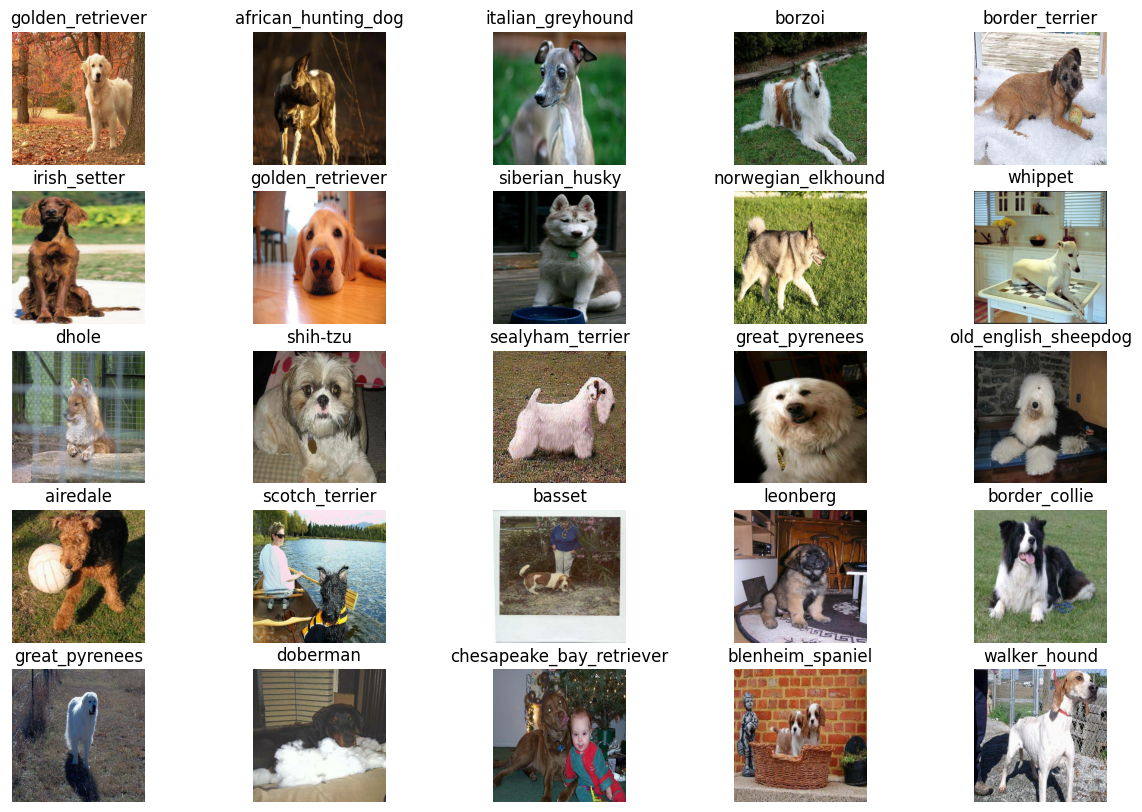

In [ ]:
#now let'd visualize the training data
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

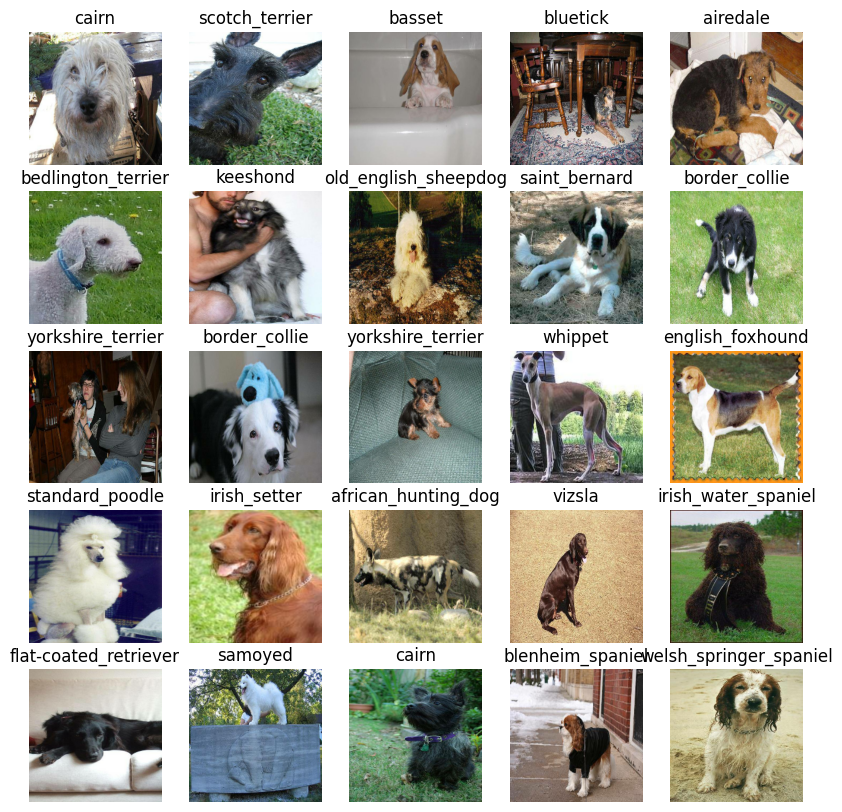

In [ ]:
#now let'd visualize the validation data
val_images,val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a Model

Before building a model , there are few things we need to define:
* The input shape (our image shape , in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The url of the model we want to use.


In [ ]:
#SETUP IMAGE SHAPE TO MODEL
INPUT_SHAPE =[None,IMG_SIZE,IMG_SIZE,3]#BATCH,HEIGHT,WIDTH,COLOUR CHANNELS

#setup the output shape of model
OUTPUT_SHAPE = len(unique_breeds)

#setup model URL from Tensorflow Hub
# MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow1/050-128-feature-vector/2"
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first ,then this , then that)
* Compilse the model (says how it should be evaluateed and improved)
* Builds the model (tells the model the input shape it'll be getting ).
* Returns the model


In [ ]:
#create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with ...", model_url)

  #setup model layers
  model= tf.keras.Sequential([
      hub.KerasLayer(model_url),#layer 1 (input layer)
      tf.keras.layers.Dense(units=output_shape,
                            activation="softmax")#layer 2 (output layer)
  ])

  # compile the model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer= tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #builds the model
  model.build(input_shape)
  return model

In [ ]:
model=create_model()
model.summary()

Building model with ... https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## creating callbacks

callbacks are helper functions a model can use during training to do such things as save its progress or stop training early if a model stops improving.

we will create two callbacks , one for tensorboard which helps track our model's progress and another for early stopping which prevents our model from training too long.

### TensorBoard callback
To setup a TensorBoard callback, we need to do 3 things:
1. load the TensorBoard notebook extension✅
2. Create a Tensorboard callback which is able to save logs to a directory and pass it to our model's  `fit()` function.
3.  Visualize our model training logs with the `%tensorboard` magic function(we'll do this after model training).

In [ ]:
#load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

#create a function to build a TensorBoard callback
def create_tensorboard_callback():
  #create a log directory for storing up tensorboard logs.
  logdir= os.path.join("drive/MyDrive/dog_vision/logs",
                       #make it so the logs get tracked whenever we run an experiment
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early  stopping  callback

early stopping helps stop our model from overfitting by stopping training if a certain evaluation metrics stop  improving.


In [ ]:
#create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of Data)

Our model is only going to train on 1000 images , to make sure everything is working.

In [ ]:
NUM_EPOCHS= 30#@param {type: "slider", min:10,max:100,step:10 }

In [ ]:
#again makinng sure we are connected to a gpu
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

NameError: name 'tf' is not defined

Let's create a function which trains a model.

* create a moedel using `create_model()`
* setup a tensorboard callback using `create_tensorboard_callback()`.
* call the `fit()` function on our model passing it the training data , validation data , number of epochs to train for (NUM_EPOCHS) and the callbacks  we'd like to use.
* returns the model

In [ ]:
#Builds a function to train and return a trained model
def train_model():
  """
  train a given model and returns the trained version
  """
  #create a model
  model = create_model()

  #create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #fit the model to data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  #returns the fitted model
  return model

In [ ]:
#fit the model to data
model= train_model()

NameError: name 'create_model' is not defined